### 🧑‍🏫 Instructions

FLORES 200 dataset

1. dev/ and devtest/ contains the sentences in same order for each language.
2. metadata_dev.tsv and metadata_devtest.tsv contains tab separated metadata for each of the sentences. The sentences are in same order as of dev/<lang>.dev and devtest/<lang>.devtest


In [12]:
%pip install -q -r requirements.txt

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [13]:
import glob
import json
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace
import os

# Initialize the tokenizer and trainer
tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
trainer = BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])
tokenizer.pre_tokenizer = Whitespace()

# Get all the files with .dev extension in the /flores200_dataset/dev directory
files = glob.glob("inputs/flores200_dataset/dev/*.dev")

# Train the tokenizer on all the files
tokenizer.train(files, trainer)

# Save the trained tokenizer
tokenizer.save("results/tokenizer.json")
print("Tokenizer saved to inputs/tokenizer.json")

# Function to extract language code from file name
def get_language_from_filename(filename):
    return os.path.basename(filename).split('.')[0]

language_vocabularies = {}

# Iterate over files to get the vocabulary for each language
for file in files:
    # Extract language code from the file name
    language_code = get_language_from_filename(file)
    
    # Tokenize the content of the file
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
    
    encoded = tokenizer.encode(text)
    unique_tokens = set(encoded.tokens)
    
    # Get the global vocabulary of the tokenizer
    global_vocab = tokenizer.get_vocab()
    
    # Filter the global vocabulary to get only the relevant tokens for this file
    vocab = {token: global_vocab[token] for token in unique_tokens if token in global_vocab}
    language_vocabularies[language_code] = vocab

with open("results/language_vocabularies.json", 'w', encoding='utf-8') as f:
    json.dump(language_vocabularies, f, ensure_ascii=False, indent=4)

print("Language vocabularies saved to results/language_vocabularies.json")





Tokenizer saved to inputs/tokenizer.json
Language vocabularies saved to results/language_vocabularies.json


# 📈 Analysis


In [14]:
# Get length of the tokenizer
vocab_size = len(tokenizer.get_vocab())
print("Vocabulary size:", vocab_size)

Vocabulary size: 30000


In [15]:
def get_basic_stats(vocab):
    return {
        "vocab_size": len(vocab),
        "vocab_size_percentage": len(vocab)/vocab_size*100,
        "average_token_length": sum(len(token) for token in vocab)/len(vocab)
    }

In [16]:
# Get only from the languages we want from inputs/FLORES-200.lang_info.csv (first column)

# Read the language info file
with open("inputs/FLORES-200.lang_info.csv", 'r', encoding='utf-8') as f:
    lines = f.readlines()
    
# Get the languages we want to keep (separated by \t, get last column)
languages = [line.split('\t')[-1].strip() for line in lines]
print(languages)

# Filter the language vocabularies to keep only the languages we want
filtered_language_vocabularies = {language: vocab for language, vocab in language_vocabularies.items() if language in languages}

print("Filtered language vocabularies:" , filtered_language_vocabularies)
print("Number of filtered language vocabularies:" , len(filtered_language_vocabularies))

['lang_script', 'eng_Latn', 'nld_Latn', 'ltz_Latn', 'fra_Latn', 'spa_Latn', 'glg_Latn', 'rus_Cyrl', 'pol_Latn', 'mkd_Cyrl']
Filtered language vocabularies: {'nld_Latn': {'deze': 26684, 'Nor': 8038, 'belo': 20050, 'Steve': 19839, '+': 16, 'Ecuador': 16504, 'Bul': 20118, 'see': 14421, 'Thai': 16562, 'ketball': 28709, 'kru': 16852, 'moot': 25847, 'diag': 20802, 'tur': 7192, '40': 8167, 'gt': 14268, 'NMR': 18859, 'eke': 14140, 'Nie': 29113, 'elt': 12639, 'Parenthood': 13336, 'mir': 8817, 'Pedrillo': 19620, 'dza': 9173, 'country': 26137, 'Fonseca': 18854, 'rang': 13067, 'fl': 10534, 'club': 21827, 'tus': 8878, 'Smith': 21109, 'mag': 7342, 'even': 11901, 'ise': 7376, 'Felipe': 19845, 'UNESCO': 13286, 'unning': 9322, 'su': 6892, 'person': 9403, 'jaar': 18099, 'Bhutan': 24978, 'inn': 8582, 'Kirby': 19525, 'Kokoda': 20948, 'Zayat': 13494, 'oty': 22176, 've': 6921, 'tati': 20130, '104': 15194, 'wes': 14407, 'Bobek': 13544, 'tor': 7359, 'and': 7147, 'ur': 6924, 'navi': 14123, 'ring': 7591, 'Canyo

In [17]:
# Get average of token length for filtered languages
for language, vocab in filtered_language_vocabularies.items():
    stats = get_basic_stats(vocab)
    print(f"Language: {language}")
    print(f"  Vocabulary size: {stats['vocab_size']}")
    print(f"  Vocabulary size percentage: {stats['vocab_size_percentage']:.2f}%")
    print(f"  Average token length: {stats['average_token_length']:.2f}")

Language: nld_Latn
  Vocabulary size: 3094
  Vocabulary size percentage: 10.31%
  Average token length: 4.07
Language: mkd_Cyrl
  Vocabulary size: 1198
  Vocabulary size percentage: 3.99%
  Average token length: 3.02
Language: rus_Cyrl
  Vocabulary size: 1455
  Vocabulary size percentage: 4.85%
  Average token length: 3.18
Language: glg_Latn
  Vocabulary size: 3155
  Vocabulary size percentage: 10.52%
  Average token length: 4.08
Language: pol_Latn
  Vocabulary size: 2921
  Vocabulary size percentage: 9.74%
  Average token length: 3.83
Language: ltz_Latn
  Vocabulary size: 3141
  Vocabulary size percentage: 10.47%
  Average token length: 3.92
Language: spa_Latn
  Vocabulary size: 3145
  Vocabulary size percentage: 10.48%
  Average token length: 4.06
Language: fra_Latn
  Vocabulary size: 2938
  Vocabulary size percentage: 9.79%
  Average token length: 4.02
Language: eng_Latn
  Vocabulary size: 3272
  Vocabulary size percentage: 10.91%
  Average token length: 4.20


In [18]:
# Get all language families from inputs/FLORES-200.lang_info.csv (second column)
# language_families = {"lang_family": line.split('\t')[2] for line in lines}#
language_families = {line.split('\t')[0]: line.split('\t')[2] for line in lines}

print("Language families:", language_families)

Language families: {'': 'lang_family', 'eng': 'Germanic', 'nld': 'Germanic', 'ltz': 'Germanic', 'fra': 'Romance', 'spa': 'Romance', 'glg': 'Romance', 'rus': 'Balto-Slavic', 'pol': 'Balto-Slavic', 'mkd': 'Balto-Slavic'}


Family: Germanic
  Vocabulary size: 4781
  Vocabulary size percentage: 15.94%
  Average token length: 3.98
Family: Romance
  Vocabulary size: 4477
  Vocabulary size percentage: 14.92%
  Average token length: 4.00
Family: Balto-Slavic
  Vocabulary size: 4136
  Vocabulary size percentage: 13.79%
  Average token length: 3.58


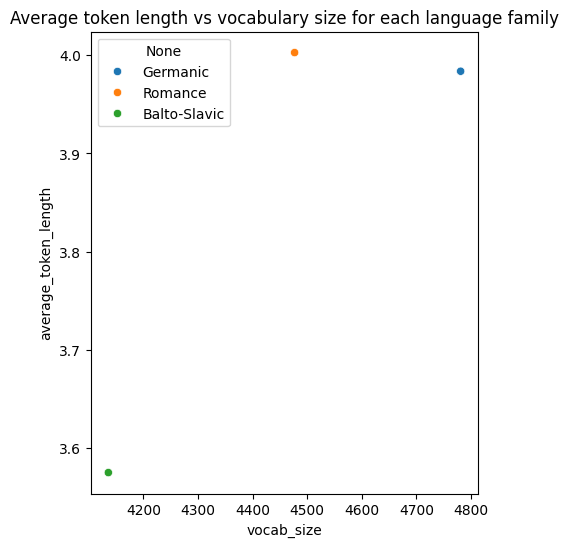

In [19]:
# Get the average of tokens for each language family
family_vocabularies = {family: {} for family in language_families.values()}

for language, vocab in filtered_language_vocabularies.items():
    # Get first 3 characters of language code
    code = language[:3]
    family = language_families[code]
    family_vocabularies[family].update(vocab)
    
# Get the stats for the families
# WARNING : the vocabulary size is not the sum of the vocabularies of the languages in the family but the union of the vocabularies
for family, vocab in family_vocabularies.items():
    # Check if vocabulary is empty
    if not vocab:
        continue
    
    stats = get_basic_stats(vocab)
    print(f"Family: {family}")
    print(f"  Vocabulary size: {stats['vocab_size']}")
    print(f"  Vocabulary size percentage: {stats['vocab_size_percentage']:.2f}%")
    print(f"  Average token length: {stats['average_token_length']:.2f}")
    
# Plot with cicrle size proportional to the vocabulary size
import seaborn as sns
import pandas as pd
# Get the vocabulary sizes and average token lengths for each family
family_stats = {family: get_basic_stats(vocab) for family, vocab in family_vocabularies.items() if vocab}

# Create a DataFrame from the stats
df = pd.DataFrame(family_stats).T

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 6))
sns.scatterplot(data=df, x='vocab_size', y='average_token_length', hue=df.index, sizes=(1, 10), ax=ax)
plt.title("Average token length vs vocabulary size for each language family")
plt.show()